## 5.2. Multivariate Regression

In [2]:
# Import required modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
# Load the dataset
df = pd.read_csv("Data\winequality-red.csv")

<>:2: SyntaxWarning: invalid escape sequence '\w'
<>:2: SyntaxWarning: invalid escape sequence '\w'
C:\Users\Saian\AppData\Local\Temp\ipykernel_4972\1194014973.py:2: SyntaxWarning: invalid escape sequence '\w'
  df = pd.read_csv("Data\winequality-red.csv")


### 5.2.1. Feature Selection

Perform a Variance Inflation Factor (VIF) analysis (on all variables) to examine multicollinearity.

In [4]:
# Select independent variables (excluding 'quality' since it's the target variable)
features = [ 'fixed acidity', 'density','volatile acidity', 'citric acid', 'residual sugar', 
            'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
            'pH', 'sulphates', 'alcohol']

# Prepare the feature matrix for VIF calculation
X = df[features].dropna()  # Remove any missing values if present
X = sm.add_constant(X)  # Add intercept term (required for statsmodels' VIF calculation)

# Compute VIF for each feature
vif_data = pd.DataFrame({
    "Feature": X.columns,
    "VIF": [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

# Drop the constant term from results
vif_data = vif_data[vif_data["Feature"] != "const"]

# Display the results
print(vif_data)


                 Feature       VIF
1          fixed acidity  7.767512
2                density  6.343760
3       volatile acidity  1.789390
4            citric acid  3.128022
5         residual sugar  1.702588
6              chlorides  1.481932
7    free sulfur dioxide  1.963019
8   total sulfur dioxide  2.186813
9                     pH  3.329732
10             sulphates  1.429434
11               alcohol  3.031160


Remove variables with VIF > 5 one by one and observe the effect on VIF.

In [5]:
# Removing fixed acidity
features = [ 'density','volatile acidity', 'citric acid', 'residual sugar', 
            'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
            'pH', 'sulphates', 'alcohol']

# Prepare the feature matrix for VIF calculation
X = df[features].dropna()  # Remove any missing values if present
X = sm.add_constant(X)  # Add intercept term (required for statsmodels' VIF calculation)

# Compute VIF for each feature
vif_data = pd.DataFrame({
    "Feature": X.columns,
    "VIF": [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

# Drop the constant term from results
vif_data = vif_data[vif_data["Feature"] != "const"]

# Display the results
print(vif_data)


                 Feature       VIF
1                density  2.430096
2       volatile acidity  1.784963
3            citric acid  2.780557
4         residual sugar  1.386375
5              chlorides  1.401232
6    free sulfur dioxide  1.939209
7   total sulfur dioxide  2.069396
8                     pH  1.610775
9              sulphates  1.396382
10               alcohol  2.136067


In [6]:
# Removing density
features = [ 'fixed acidity','volatile acidity', 'citric acid', 'residual sugar', 
            'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
            'pH', 'sulphates', 'alcohol']

# Prepare the feature matrix for VIF calculation
X = df[features].dropna()  # Remove any missing values if present
X = sm.add_constant(X)  # Add intercept term (required for statsmodels' VIF calculation)

# Compute VIF for each feature
vif_data = pd.DataFrame({
    "Feature": X.columns,
    "VIF": [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

# Drop the constant term from results
vif_data = vif_data[vif_data["Feature"] != "const"]

# Display the results
print(vif_data)


                 Feature       VIF
1          fixed acidity  2.975491
2       volatile acidity  1.759879
3            citric acid  3.127791
4         residual sugar  1.099433
5              chlorides  1.468893
6    free sulfur dioxide  1.948691
7   total sulfur dioxide  2.173240
8                     pH  2.239412
9              sulphates  1.341524
10               alcohol  1.299603


### 5.2.2. Fitting the Model

In [7]:
# Choose x's and y
X = df[['alcohol', 'volatile acidity', 'sulphates']].to_numpy()
y = df['quality'].dropna()

In [8]:
# Fit the model
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     268.9
Date:                Sun, 16 Mar 2025   Prob (F-statistic):          3.16e-141
Time:                        13:29:18   Log-Likelihood:                -1599.4
No. Observations:                1599   AIC:                             3207.
Df Residuals:                    1595   BIC:                             3228.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6108      0.196     13.342      0.0

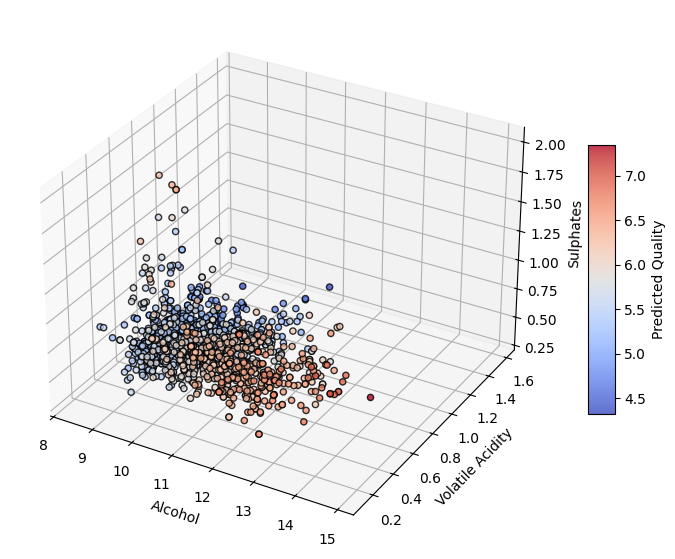

In [13]:
from mpl_toolkits.mplot3d import Axes3D

y_pred = model.predict(X)  # Get predicted quality values

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color mapping for predicted quality
sc = ax.scatter(df['alcohol'], df['volatile acidity'], df['sulphates'], 
                c=y_pred, cmap='coolwarm', edgecolor='k', alpha=0.8)

# Labels and title
ax.set_xlabel("Alcohol")
ax.set_ylabel("Volatile Acidity")
ax.set_zlabel("Sulphates")
# ax.set_title("3D Scatter Plot of Wine Characteristics with Predicted Quality")

# Add color bar
cbar = fig.colorbar(sc, ax=ax, shrink=0.5, aspect=10)
cbar.set_label("Predicted Quality")

# Show plot
plt.show()